In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
url_pitch1 = "https://www.cbssports.com/mlb/stats/player/pitching/mlb/all-pos/qualifiers/"
pitch1 = pd.read_html(url_pitch1)[0]
url_pitch2 = "https://www.cbssports.com/mlb/stats/player/pitching/mlb/all-pos/qualifiers/?page=2"
pitch2 = pd.read_html(url_pitch2)[0]

In [3]:
pitch_df = pd.concat([pitch1, pitch2], axis=0)
pitch_df

,Player Player on team,GP Games played,GS Game Started,IP Innings Pitched,W Wins,L Losses,SV Saves,SVO Save Opportunities,H Hits,R Runs,HR Home Runs,ER Earned Runs,ERA Earned Run Average,BB Base on Balls (Walk),SO Strikeouts,TP Total Pitches,WHIP Walks and Hits Allowed Per Inning
0,T. Skubal SP DET Tarik Skubal SP DET,26,26,160.1,15,4,0,0,120,49,13,46,2.58,33,193,2390,0.95
1,C. Sale SP ATL Chris Sale SP ATL,24,24,147.2,14,3,0,0,117,44,8,43,2.62,33,191,2311,1.02
2,Z. Wheeler SP PHI Zack Wheeler SP PHI,26,26,160.2,12,6,0,0,115,54,17,49,2.74,45,176,2561,1.00
3,H. Greene SP CIN Hunter Greene SP CIN,24,24,143.1,9,4,0,0,93,46,11,45,2.83,53,162,2453,1.02
4,J. Flaherty SP LAD Jack Flaherty SP LAD,23,23,135.0,10,6,0,0,112,50,21,46,3.07,26,167,2179,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,A. Gomber SP COL Austin Gomber SP COL,25,25,138.0,4,9,0,0,143,73,26,72,4.70,35,98,2217,1.29
7,M. Waldron SP SD Matt Waldron SP SD,26,26,142.2,7,11,0,0,137,79,19,76,4.79,40,130,2356,1.24
8,G. Canning SP LAA Griffin Canning SP LAA,26,25,139.0,4,11,0,0,143,85,24,80,5.18,48,102,2309,1.37
9,M. Mikolas SP STL Miles Mikolas SP STL,27,27,149.2,8,10,0,0,164,88,21,87,5.23,24,102,2316,1.26


In [4]:
pitch_df.columns

Index(['Player  Player on team', 'GP  Games played', 'GS  Game Started',
       'IP  Innings Pitched', 'W  Wins', 'L  Losses', 'SV  Saves',
       'SVO  Save Opportunities', 'H  Hits', 'R  Runs', 'HR  Home Runs',
       'ER  Earned Runs', 'ERA  Earned Run Average',
       'BB  Base on Balls (Walk)', 'SO  Strikeouts', 'TP  Total Pitches',
       'WHIP  Walks and Hits Allowed Per Inning'],
      dtype='object')

In [5]:
pitch_df.columns = ["Player","GP","GS","IP","W","L","SV","SVO","H","R","HR","ER","ERA","BB","SO","TP","WHIP"]
pitch_df

,Player,GP,GS,IP,W,L,SV,SVO,H,R,HR,ER,ERA,BB,SO,TP,WHIP
0,T. Skubal SP DET Tarik Skubal SP DET,26,26,160.1,15,4,0,0,120,49,13,46,2.58,33,193,2390,0.95
1,C. Sale SP ATL Chris Sale SP ATL,24,24,147.2,14,3,0,0,117,44,8,43,2.62,33,191,2311,1.02
2,Z. Wheeler SP PHI Zack Wheeler SP PHI,26,26,160.2,12,6,0,0,115,54,17,49,2.74,45,176,2561,1.00
3,H. Greene SP CIN Hunter Greene SP CIN,24,24,143.1,9,4,0,0,93,46,11,45,2.83,53,162,2453,1.02
4,J. Flaherty SP LAD Jack Flaherty SP LAD,23,23,135.0,10,6,0,0,112,50,21,46,3.07,26,167,2179,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,A. Gomber SP COL Austin Gomber SP COL,25,25,138.0,4,9,0,0,143,73,26,72,4.70,35,98,2217,1.29
7,M. Waldron SP SD Matt Waldron SP SD,26,26,142.2,7,11,0,0,137,79,19,76,4.79,40,130,2356,1.24
8,G. Canning SP LAA Griffin Canning SP LAA,26,25,139.0,4,11,0,0,143,85,24,80,5.18,48,102,2309,1.37
9,M. Mikolas SP STL Miles Mikolas SP STL,27,27,149.2,8,10,0,0,164,88,21,87,5.23,24,102,2316,1.26


In [6]:
np.median(pitch_df["IP"])

145.0

In [7]:
below_median = pitch_df.query('IP < 143.6')
below_median

,Player,GP,GS,IP,W,L,SV,SVO,H,R,HR,ER,ERA,BB,SO,TP,WHIP
3,H. Greene SP CIN Hunter Greene SP CIN,24,24,143.1,9,4,0,0,93,46,11,45,2.83,53,162,2453,1.02
4,J. Flaherty SP LAD Jack Flaherty SP LAD,23,23,135.0,10,6,0,0,112,50,21,46,3.07,26,167,2179,1.02
5,S. Imanaga SP CHC Shota Imanaga SP CHC,24,24,140.1,10,3,0,0,127,58,22,48,3.08,22,140,2117,1.06
7,R. Blanco SP HOU Ronel Blanco SP HOU,25,25,143.1,9,6,0,0,98,54,21,50,3.14,57,141,2326,1.08
13,F. Valdez SP HOU Framber Valdez SP HOU,23,23,143.1,13,6,0,0,120,55,11,52,3.27,44,139,2124,1.14
18,M. Wacha SP KC Michael Wacha SP KC,23,23,133.0,11,6,0,0,121,51,14,49,3.32,38,113,2054,1.20
19,G. Stone SP LAD Gavin Stone SP LAD,24,24,135.1,11,5,0,0,128,50,16,50,3.33,36,112,2069,1.21
22,T. Bibee SP CLE Tanner Bibee SP CLE,25,25,138.0,10,6,0,0,119,56,16,53,3.46,33,150,2292,1.10
24,T. Glasnow SP LAD Tyler Glasnow SP LAD,22,22,134.0,9,6,0,0,92,53,15,52,3.49,35,168,2011,0.95
25,M. Fried SP ATL Max Fried SP ATL,23,23,133.2,8,7,0,0,115,58,10,52,3.50,46,126,2165,1.20


In [8]:
pitch_df.dtypes

Player     object
GP          int64
GS          int64
IP        float64
W           int64
L           int64
SV          int64
SVO         int64
H           int64
R           int64
HR          int64
ER          int64
ERA       float64
BB          int64
SO          int64
TP          int64
WHIP      float64
dtype: object

In [9]:
pitch_df = pitch_df[['Player','ERA','SO']]
pitch_df

,Player,ERA,SO
0,T. Skubal SP DET Tarik Skubal SP DET,2.58,193
1,C. Sale SP ATL Chris Sale SP ATL,2.62,191
2,Z. Wheeler SP PHI Zack Wheeler SP PHI,2.74,176
3,H. Greene SP CIN Hunter Greene SP CIN,2.83,162
4,J. Flaherty SP LAD Jack Flaherty SP LAD,3.07,167
...,...,...,...
6,A. Gomber SP COL Austin Gomber SP COL,4.70,98
7,M. Waldron SP SD Matt Waldron SP SD,4.79,130
8,G. Canning SP LAA Griffin Canning SP LAA,5.18,102
9,M. Mikolas SP STL Miles Mikolas SP STL,5.23,102


In [10]:
data = pitch_df.drop('Player', axis=1)
scaled_pitch_df = StandardScaler().fit_transform(data)
scaled_pitch_df

array([[-1.85268311,  2.12011303],
       [-1.78814997,  2.03838987],
       [-1.59455053,  1.4254662 ],
       [-1.44935096,  0.85340411],
       [-1.06215209,  1.057712  ],
       [-1.0460188 , -0.04555061],
       [-1.02988552,  1.26201989],
       [-0.94921909, -0.00468903],
       [-0.94921909,  1.34374305],
       [-0.86855265,  0.19961886],
       [-0.80401951, -0.16813535],
       [-0.80401951,  0.07703412],
       [-0.78788622,  0.36306517],
       [-0.73948637, -0.08641219],
       [-0.72335308,  0.19961886],
       [-0.72335308,  1.87494356],
       [-0.69108651,  0.4856499 ],
       [-0.67495322, -0.49502797],
       [-0.65881993, -1.14881322],
       [-0.64268665, -1.1896748 ],
       [-0.56202022, -0.00468903],
       [-0.51362036, -0.78105902],
       [-0.43295393,  0.36306517],
       [-0.40068735,  0.40392675],
       [-0.38455407,  1.09857358],
       [-0.36842078, -0.61761271],
       [-0.3522875 ,  0.32220359],
       [-0.3522875 , -1.02622849],
       [-0.25548778,

C:\Users\294747\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\294747\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\294747\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\294747\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: 

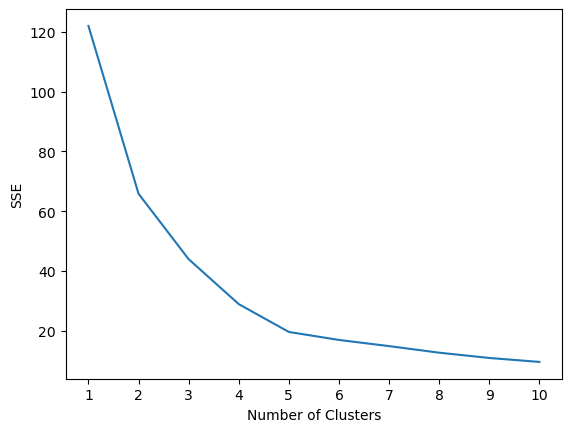

In [11]:
kmeans_kwargs = {
    'init':'random',
    'n_init': 10,
    'random_state': 1,
}

#Create list to hold SSE values for each k
sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pitch_df)
    sse.append(kmeans.inertia_)
    
#Visualize results
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [12]:
#Instantiate the k-means class, using optiomal number of clusters
kmeans = KMeans(init='random', n_clusters=5, n_init=10, random_state=0)

#Fit k-means algorithm data
kmeans.fit(scaled_pitch_df)

#View cluster assignments for each observation
kmeans.labels_

C:\Users\294747\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 1,
       3, 3, 2, 1, 3, 1, 2, 3, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0])

In [13]:
pitch_df['cluster'] = kmeans.labels_
pitch_df

C:\Users\294747\AppData\Local\Temp\1\ipykernel_25452\1933556775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_df['cluster'] = kmeans.labels_


,Player,ERA,SO,cluster
0,T. Skubal SP DET Tarik Skubal SP DET,2.58,193,2
1,C. Sale SP ATL Chris Sale SP ATL,2.62,191,2
2,Z. Wheeler SP PHI Zack Wheeler SP PHI,2.74,176,2
3,H. Greene SP CIN Hunter Greene SP CIN,2.83,162,2
4,J. Flaherty SP LAD Jack Flaherty SP LAD,3.07,167,2
...,...,...,...,...
6,A. Gomber SP COL Austin Gomber SP COL,4.70,98,0
7,M. Waldron SP SD Matt Waldron SP SD,4.79,130,0
8,G. Canning SP LAA Griffin Canning SP LAA,5.18,102,0
9,M. Mikolas SP STL Miles Mikolas SP STL,5.23,102,0


In [23]:
pitch_df['cluster']

0     2
1     2
2     2
3     2
4     2
     ..
6     0
7     0
8     0
9     0
10    0
Name: cluster, Length: 61, dtype: int32

In [31]:
label_0 = pitch_df[kmeans.labels_ == 0]
label_1 = pitch_df[kmeans.labels_ == 1]
label_2 = pitch_df[kmeans.labels_ == 2]
label_3 = pitch_df[kmeans.labels_ == 3]
label_4 = pitch_df[kmeans.labels_ == 4]

In [36]:
cols = label_0.columns

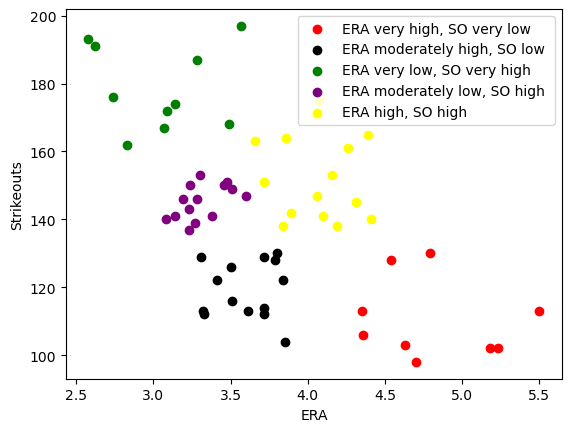

In [58]:
c0 = plt.scatter(label_0[cols[0]], label_0[cols[1]], color='red')
c1 = plt.scatter(label_1[cols[0]], label_1[cols[1]], color='black')
c2 = plt.scatter(label_2[cols[0]], label_2[cols[1]], color='green')
c3 = plt.scatter(label_3[cols[0]], label_3[cols[1]], color='purple')
c4 = plt.scatter(label_4[cols[0]], label_4[cols[1]], color='yellow')

plt.xlabel('ERA')
plt.ylabel('Strikeouts')
plt.legend(['ERA very high, SO very low', 'ERA moderately high, SO low ', 'ERA very low, SO very high', 'ERA moderately low, SO high ', 'ERA high, SO high'])

In [14]:
pitch_df = pitch_df.drop('Player', axis=1)

In [15]:
pitch_df_avgs = pitch_df.groupby(['cluster']).agg({'ERA':'mean', 'SO': 'mean'})
pitch_df_avgs

,ERA,SO
cluster,,
0,4.808889,110.555556
1,3.602143,119.285714
2,3.041000,178.700000
3,3.313571,145.214286
4,4.065714,151.642857


In [16]:
#pitch_df.to_csv('Pitcher_Clusters_082724_3.csv')